<a href="https://colab.research.google.com/github/KaisenWu/MachineLearning_Project_ClusteringAlgorismComparison_Python/blob/main/MachineLearning_Project_ClusteringAlgorismComparison_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Clustering Algorism Comparison with PCA and Piplines</center>

## Project Pverview
This project is used to find the best clustering algorism by comparing there evaluation score.
The main techniques whcih were used in this projects are:


1.   Cluster number analysis by elbow and silhouette method.
2.   Principle conponents analysis. (PCA)
3.   Data scaling.
4.   Data clustering.
5.   Clustering algorism evaluation.



## About The Dataset
This dataset concludes ths records of the courses.

## Data Loading

In [1]:
# Load the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataframe.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_prepared.csv')

In [3]:
df.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
0,4.5,2826.0,14269.0,20.10,41.0,7.133333,19.99,88,4.5,11922.0,53659.0,10.0,0,0,0,0
1,3.3,320.0,2088.0,17.02,72.0,4.133333,16.99,90,3.3,320.0,4012.0,3.0,0,0,0,0
2,4.4,991.0,3563.0,20.08,91.0,5.233333,28.99,77,4.4,2193.0,7422.0,6.0,0,0,0,0
3,4.7,556.0,2263.0,20.10,70.0,4.966667,16.99,88,4.6,74745.0,517994.0,42.0,0,0,1,0
4,4.3,2060.0,10927.0,20.07,477.0,51.983333,20.99,87,4.5,288507.0,988948.0,50.0,0,1,0,0


## Use elbow method to determine the best cluster number.

In [4]:
# Impoet the KMeans library.
from sklearn.cluster import KMeans

In [5]:
# Define a function to get the sum of square error list from 1 to 14 clusters.
def calculate_sum_of_square_error(df):
  sum_of_square_error_list = []
  for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sum_of_square_error_list.append(kmeans.inertia_)
  return sum_of_square_error_list

In [6]:
# Call the method by the dataframe.
sum_of_square_error_list = calculate_sum_of_square_error(df)

Text(0, 0.5, 'Sum of Square Error')

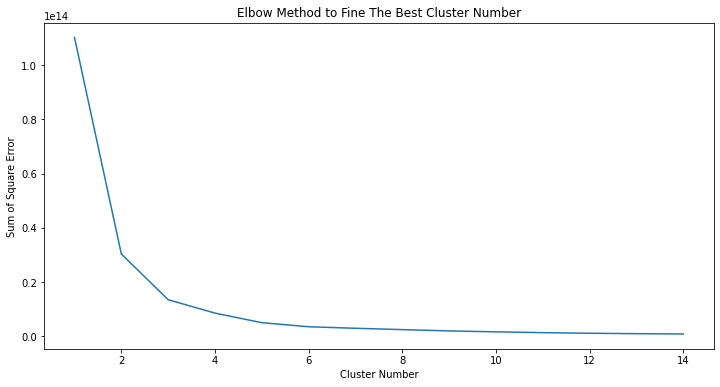

In [7]:
# Plot the sum of square error by different cluster number.
plt.figure(figsize=(12,6))
plt.plot(range(1,15), sum_of_square_error_list)
plt.title('Elbow Method to Fine The Best Cluster Number')
plt.xlabel('Cluster Number')
plt.ylabel('Sum of Square Error')

In [8]:
# Install the kneed package.
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Import the KneeLocator library.
from kneed import KneeLocator

In [10]:
# Define the knee instance by the sum of square error and the corresponding cluster number.
knee = KneeLocator(range(1,15), sum_of_square_error_list,curve='convex', direction='decreasing')
# Display the elbow.
knee.elbow

3

## Use silhouette method to determine the best cluster number.

In [11]:
# Import the silouette evaluation library.
from sklearn.metrics import silhouette_score

In [12]:
# Get all the silhouetter score.
silhouette_score_list = []
for n in range(2,15):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silhouette_score_list.append(score)

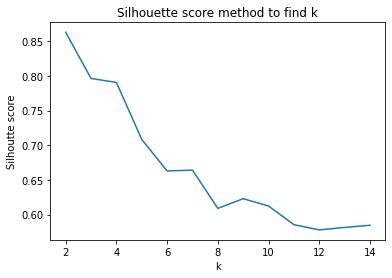

In [13]:
# Plot the scores.
plt.plot(range(2,15), silhouette_score_list)
plt.xlabel('k')
plt.ylabel('Silhoutte score')
plt.title('Silhouette score method to find k')
plt.show()

## Prepare the pipeline.

In [14]:
# Import PCA library.
from sklearn.decomposition import PCA

In [15]:
# Import MinMax scaler library.
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Declare an AgglomerativeClustering instance.
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)

In [17]:
# Declare an KMeans instance.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [18]:
# Declare an SpectralClustering instance.
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3)

In [19]:
# Declare the algorism, pipelines and pipeline names list.
clustering_algorism_list = [ac, km, sc]
pipelines = []
pipline_name_list = ['Agglomerative', 'KMeans', 'Spectral']

In [20]:
# Import pipeline library.
from sklearn.pipeline import Pipeline

In [21]:
# Build the pipelines list.
for clustering_algorism in clustering_algorism_list:
  pipeline = Pipeline([
      ('PCA', PCA(n_components=2)),
      ('Scale', MinMaxScaler()),
      ('Cluster Algorism', clustering_algorism)
  ])
  pipelines.append(pipeline)

In [22]:
# Import clustring evaluation libraries.
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [23]:
# Declare scores list.
silhouette_score_list = []
carlinszky_harabaz_score_list = []
davies_bouldin_score = []

In [24]:
# Implement pipelines.
for pipeline in pipelines:
  cluster = pipeline.fit_predict(df)
  sh = silhouette_score(df, cluster, metric='euclidean')
  ch = calinski_harabasz_score(df, cluster)
  # db = davies_bouldin_score(df, cluster)
  silhouette_score_list.append(sh)
  carlinszky_harabaz_score_list.append(ch)
  # davies_bouldin_score.append(db)

In [25]:
# Merge all the scores and sort.
result = pd.DataFrame(zip(pipline_name_list, silhouette_score_list, carlinszky_harabaz_score_list), 
                      columns=["clustering name", "silhouette score", "callinszky score"])
result.sort_values(by=["silhouette score", "callinszky score"], ascending=[False, False])

,clustering name,silhouette score,callinszky score
2,Spectral,0.820674,1128.501970
1,KMeans,0.807503,2389.362255
0,Agglomerative,0.803115,2244.641793


## Use the best algorism to implement clustring.

In [26]:
# Declare the PCA and scale pipeline.
preprocessing_pipeline = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('Scale', MinMaxScaler())
])

In [27]:
# Create the PCA dataframe.
df_pca = pd.DataFrame(
    preprocessing_pipeline.fit_transform(df),
    columns=['Component 1', 'Component 2']
)

In [28]:
# Get labels of each instance.
df_pca['Prediction'] = clustering_algorism_list[2].labels_

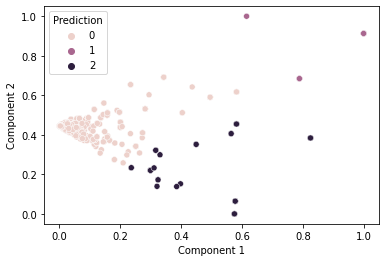

In [29]:
# Plot the clustring.
sns.scatterplot(data = df_pca, x='Component 1', y='Component 2', hue='Prediction')